In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv
/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv


# Importing necessary libraries

In [2]:
!pip install nltk
!pip install wordcloud
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 

# Libraries for Sentiment Analysis 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob 
from wordcloud import WordCloud 

# to avoid warnings 
import warnings 
warnings.filterwarnings('ignore') 


**TextBlob:** Used for tokenization as well as for finding the polarity and subjectivity of a text

**Regular expression (re):** removes unnecessary symbols that do not provide any meaning such as @, comma, hashtags, *, etc.

**Natural Language Toolkit (nltk):** removes stop words such as and, is, the, in, or, etc.

# Importing datasets

In [8]:
# reading datasets 
trump = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv", lineterminator='\n') 
print(trump.head(3)) 


            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2  Will mock for food! Freelance writer, blogger,.

In [10]:
biden = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv", lineterminator='\n') 
print(biden.head(2)) 


            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:18  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...    0.0            0.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Twitter for iPad  809904438.0         Cheri A. 🇺🇸     Biloximeemaw   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Locked and loaded Meemaw. Love God, my family ...  ...   

  user_followers_count                 user_location       lat      long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.77427 -80.19366   
1               6628.0                           NaN       NaN       NaN   

   city    

In [12]:
print(trump.shape) 
print(biden.shape)

(970919, 21)
(776886, 21)


In [11]:
trump.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [13]:
biden.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776861 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694877 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543092 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

# Data Preprocessing

In [14]:
# creating a new column 'candidate' todifferentiate 
# between tweets of Trump and Biden upon concatination 
trump['candidate'] = 'trump'

# biden dataframe 
biden['candidate'] = 'biden'

# combining the dataframes 
data = pd.concat([trump, biden]) 

# FInal data shape 
print('Final Data Shape :', data.shape) 

# View the first 2 rows 
print("\nFirst 2 rows:") 
print(data.head(3)) 


Final Data Shape : (1747805, 22)

First 2 rows:
            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2 

# Data Cleaning:

In [15]:
# dropping null values if they exist 
data.dropna(inplace=True) 


In [16]:
data['country'].value_counts()


country
United States of America    182382
United Kingdom               31869
India                        20931
France                       19996
Germany                      18534
Canada                       16250
The Netherlands               8491
Australia                     8330
Spain                         5254
Brazil                        4211
Pakistan                      3704
Italy                         2966
Ireland                       2587
Bangladesh                    2036
Mexico                        1972
Belgium                       1962
Nigeria                       1848
South Africa                  1648
United Arab Emirates          1521
Switzerland                   1494
Peru                          1031
Lebanon                       1002
Argentina                      872
Ecuador                        824
Colombia                       565
Honduras                       508
Venezuela                      431
New Zealand                    384
Poland      

An important thing to note while exploring the data is that “United States of America” and “US” in the country column are treated as different nations in the dataset which is a major problem. Therefore, we can assign a common term “US” to treat it as one country.

In [17]:
data['country'] = data['country'].replace({'United States of America': "US",'United States': "US"}) 


# Exploratory Data Analysis

In [18]:
# Group the data by 'candidate' and count the 
# number of tweets for each candidate 
tweets_count = data.groupby('candidate')['tweet'].count().reset_index() 

# Interactive bar chart 
fig = px.bar(tweets_count, x='candidate', y='tweet', color='candidate', 
color_discrete_map={'Trump': 'pink', 'Biden': 'blue'}, 
labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'}, 
title='Tweets for Candidates') 

# Show the chart 
fig.show() 


Interpretation: Upon studying the graph, we can say that Donald Trump is the most tweeted about by the general public as compared to Joe Biden.

In [19]:
# Interactive bar chart 
likes_comparison = data.groupby('candidate')['likes'].sum().reset_index() 
fig = px.bar(likes_comparison, x='candidate', y='likes', color='candidate', 
color_discrete_map={'Trump': 'blue', 'Biden': 'green'}, 
labels={'candidate': 'Candidate', 'likes': 'Total Likes'}, 
title='Comparison of Likes') 

# Update the layout with a black theme 
fig.update_layout(plot_bgcolor='black', 
paper_bgcolor='black', font_color='white') 

# Show the chart 
fig.show() 


Interpretation: The public has tweeted the most about Donald Trump however the number of likes are high for Joe Biden which definitely indicates liking towards Biden.

**Top10 Country-wise tweets Counts**

So, let’s find out the top 10 countries that are most active in tweeting during the elections.

In [20]:
# Top10 Countrywise tweets Counts 
top10countries = data.groupby('country')['tweet'].count( 
).sort_values(ascending=False).reset_index().head(10) 
# top10countries 

# Interactive bar chart 
fig = px.bar(top10countries, x='country', y='tweet', 
template='plotly_dark', 
color_discrete_sequence=px.colors.qualitative.Dark24_r, 
title='Top10 Countrywise tweets Counts') 

# To view the graph 
fig.show() 


**Tweet Counts for Each Candidate in the Top 10 Countries**
Now, let us find out the number of tweets done for each candidate by all the countries.

In [21]:
# the number of tweets done for each 
# candidate by all the countries. 
tweet_df = data.groupby(['country', 'candidate'])[ 
'tweet'].count().reset_index() 

# Candidate for top 10 country tweet 
tweeters = tweet_df[tweet_df['country'].isin(top10countries.country)] 

# Plot for tweet counts for each candidate 
# in the top 10 countries 
fig = px.bar(tweeters, x='country', y='tweet', color='candidate', 
labels={'country': 'Country', 'tweet': 'Number of Tweets', 
'candidate': 'Candidate'}, 
title='Tweet Counts for Each Candidate in the Top 10 Countries', 
template='plotly_dark', 
barmode='group') 

# Show the chart 
fig.show() 


**Interpretation:** All the countries are tweeting the most about Trump. However, India is talking more about Joe Biden.

**Sentiment Analysis for prediction of election results**

We shall only take into account US citizens’ opinions here, as they are a crucial deciding factor in who becomes the US president.

In [22]:
def clean(text): 
	# Remove URLs 
	text = re.sub(r'https?://\S+|www\.\S+', '', str(text)) 

	# Convert text to lowercase 
	text = text.lower() 

	# Replace anything other than alphabets a-z with a space 
	text = re.sub('[^a-z]', ' ', text) 

	# Split the text into single words 
	text = text.split() 

	# Initialize WordNetLemmatizer 
	lm = WordNetLemmatizer() 

	# Lemmatize words and remove stopwords 
	text = [lm.lemmatize(word) for word in text if word not in set( 
		stopwords.words('english'))] 

	# Join the words back into a sentence 
	text = ' '.join(word for word in text) 

	return text 


**Get polarity, subjectivity, and Analysis**
Now, let’s create a function to get polarity, subjectivity, and Analysis function to fetch sentiments from the data.

In [23]:
def getpolarity(text): 
    return TextBlob(text).sentiment.polarity 

def getsubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity 

def getAnalysis(score): 
    if score < 0: 
        return 'negative'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'positive'


**Donald Trump tweet sentiment analysis**

Note: We are considering the data of only, the United States of America because that will be a major factor in predicting the results.

In [24]:
trump_tweets = data[data['candidate'] == 'trump'] 

# taking only U.S. country data 
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US'] 
trump_tweets = trump_tweets[['tweet']] 
print(trump_tweets.head()) 


                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...


**Now, we apply the clean function to get cleaned text from tweets.**

In [25]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean) 
print(trump_tweets.head()) 


                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  nypost censorship censored twitter manipulate ...  
12  trump presidenttrump trump landslidevictory tr...  
22  trump nobody like tell farmer better way worki...  


**Subjectivity**
To know if the sentence is subjective or objective. Subjective means sentence refers to a personal opinion and not facts whereas objective means facts

Now, obtaining subjectivity for Trump’s tweets.



In [26]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity) 


**Polarity**

It is represented by a float value that lies between -1 and 1, where 1 = positive sentiment, -1 = negative sentiment

Getting the polarity of the data now.

In [27]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity) 


**Sentiments**

Now, classifying the sentiments as positive, negative or neutral.

In [28]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis) 
trump_tweets.head() 


,tweet,cleantext,subjectivity,polarity,analysis
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...,0.750000,0.500000,positive
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...,0.595238,0.261905,positive


Let’s see the distribution of positive, negative and neutral sentiments.

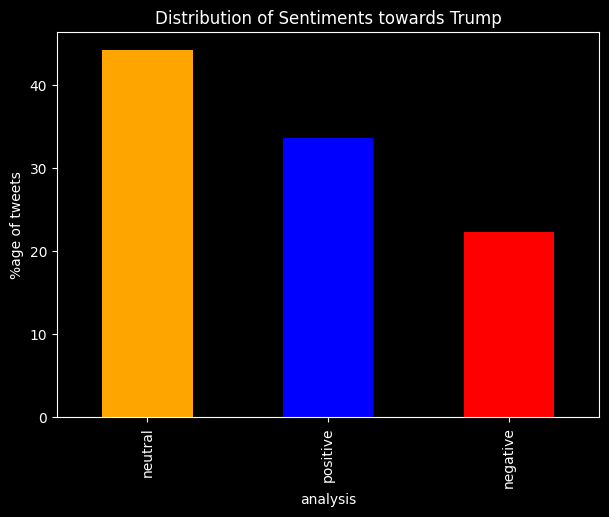

In [29]:
# how much data is positive/negetive/neutral 
plt.style.use('dark_background') # Adding black theme 

# Define colors for each bar 
colors = ['orange', 'blue', 'red'] 

plt.figure(figsize=(7, 5)) 
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors) 
plt.ylabel("%age of tweets") 
plt.title("Distribution of Sentiments towards Trump") 
plt.show() 


Now, plotting Word Cloud to quickly identify the most important themes or topics in the text and understand the overall sentiment or tone of the tweets.

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

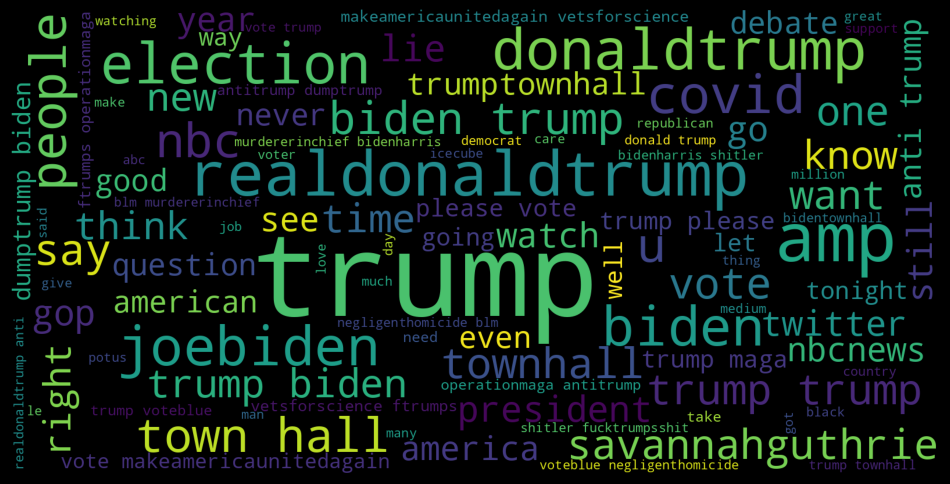

In [32]:
def word_cloud(wd_list): 
	stopwords = set(STOPWORDS) 
	all_words = ' '.join([text for text in wd_list]) 
	wordcloud = WordCloud(background_color='black', 
						stopwords=stopwords, 
						width=1600, height=800, max_words=100, max_font_size=200, 
						colormap="viridis").generate(all_words) 
	plt.figure(figsize=(12, 10)) 
	plt.axis('off') 
	plt.imshow(wordcloud) 

word_cloud(trump_tweets['cleantext'][:5000]) 


**Joe Biden’s Twitter sentiment analysis**

In [33]:
biden_tweets = data[data['candidate'] == 'biden'] 
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US'] 
biden_tweets = biden_tweets[['tweet']] 
biden_tweets


,tweet
6,"In 2020, #NYPost is being #censorship #CENSORE..."
17,"Comments on this? ""Do Democrats Understand how..."
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...
...,...
776836,"#Biden 🗽🇺🇸👍🏽 | Images 📷 @ Santa Maria, CA. | ..."
776845,Will #criticalRaceTheory become ubiquitous in ...
776847,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P
776861,#election #2020Elections #trump #biden https:/...


In [34]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean) 
biden_tweets.head()


,tweet,cleantext
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...


In [35]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity) 
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity) 
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis) 
biden_tweets.head() 


,tweet,cleantext,subjectivity,polarity,analysis
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...,1.000000,-1.000000,negative
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...,0.000000,0.000000,neutral
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...,0.178571,0.078571,positive
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...,0.000000,0.000000,neutral


Now, we find out the distribution of sentiments in the dataset to know which sentiment holds the most values and how it will affect the election results.

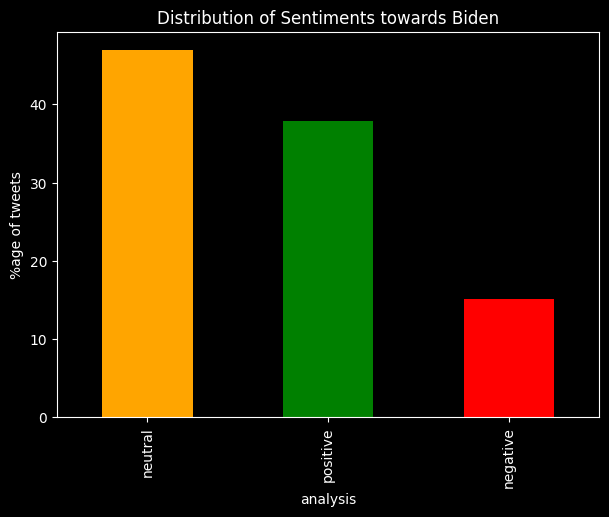

In [36]:
# how much data is positive/negetive/neutral 
plt.style.use('dark_background') 

# Define colors for each bar 
colors = ['orange', 'green', 'red'] 

plt.figure(figsize=(7, 5)) 
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors) 
plt.ylabel("%age of tweets") 
plt.title("Distribution of Sentiments towards Biden") 
plt.show() 


Now, plotting the Word Cloud for the Joe Biden dataset.

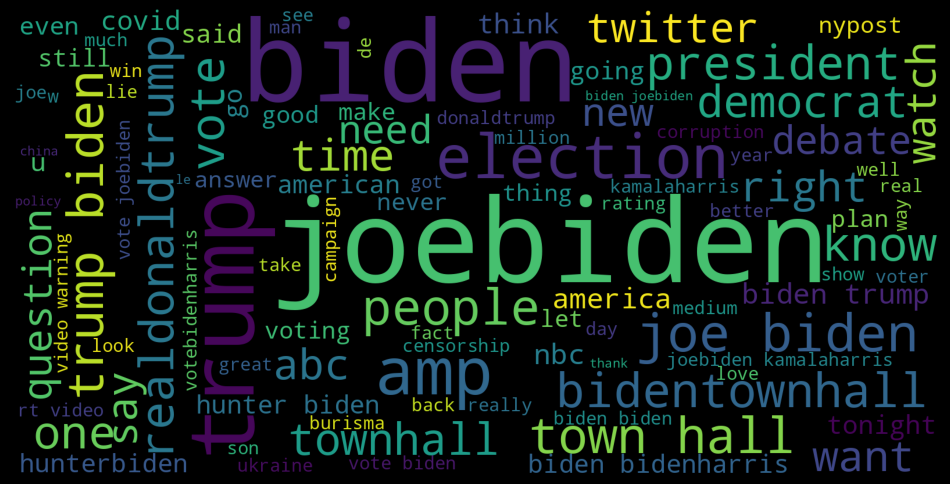

In [37]:
word_cloud(biden_tweets['cleantext'][:5000])


let us now analyze the sentiments to predict the results for Donald Trump

In [38]:
trump_tweets.analysis.value_counts(normalize=True)*100

analysis
neutral     44.158680
positive    33.623812
negative    22.217507
Name: proportion, dtype: float64

Now, analyze tweets for Joe Biden

In [39]:
biden_tweets.analysis.value_counts(normalize=True)*100


analysis
neutral     46.951959
positive    37.930271
negative    15.117771
Name: proportion, dtype: float64

**Conclusion:**
let’s analyze what each sentiment’s percentage represents and its implications on the result.

**Positive Sentiment:** This shows that Twitter users are responding more favorably to Biden.